In [29]:
# !pip install --ignore-installed --upgrade tensorflow
# ! apt-get update && apt-get install -y python3-opencv
# ! pip install opencv-python

In [47]:
# import nessesory libraries.
import os
import tensorflow as tf
import numpy as np

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import cv2

from tensorflow import keras
layers = keras.layers
models = keras.models

import glob

In [42]:
train_dir = 'split-garbage-dataset/train'
test_dir = 'split-garbage-dataset/test'
val_dir = 'split-garbage-dataset/valid'
train_dir

'split-garbage-dataset/train'

In [43]:
cardboard_train_images = glob.glob(train_dir+"/cardboard/*")
# pneumonia_train_images = glob.glob(train_dir+"/PNEUMONIA/*.png")
glass_train_images = glob.glob(train_dir+"/glass/*")
metal_train_images = glob.glob(train_dir+"/metal/*")
paper_train_images = glob.glob(train_dir+"/paper/*")
plastic_train_images = glob.glob(train_dir+"/plastic/*")
trash_train_images = glob.glob(train_dir+"/trash/*")
# normal_train_images = glob.glob(train_dir+"/NORMAL/*.png")
print('length of cardboard',len(glass_train_images))
print('length of glass',len(metal_train_images))
print('length of metal',len(metal_train_images))
print('length of paper',len(metal_train_images))
print('length of plastic',len(metal_train_images))
print('length of trash',len(metal_train_images))

length of cardboard 354
length of glass 286
length of metal 286
length of paper 286
length of plastic 286
length of trash 286


In [33]:
# plt.figure(figsize=(15, 10))
# plt.pie(x=np.array([len(cardboard_train_images), len(glass_train_images),len(metal_train_images),len(paper_train_images),len(plastic_train_images),len(trash_train_images)]), autopct="%.1f%%", explode=[0.2,0], labels=["cardboard", "glass","metal","paper","plastic","trash"], pctdistance=0.5)
# plt.title("Type of images and their share in train folder", fontsize=14);

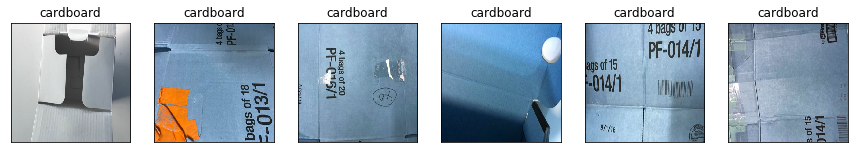

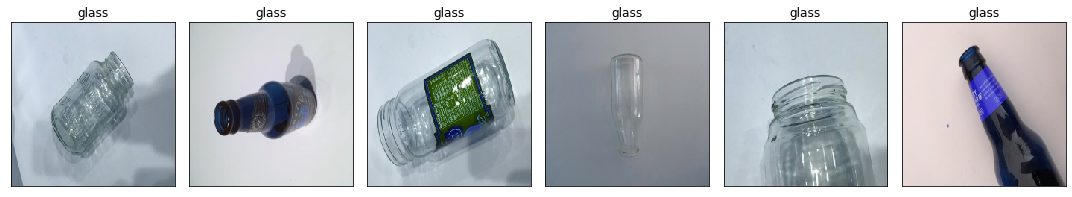

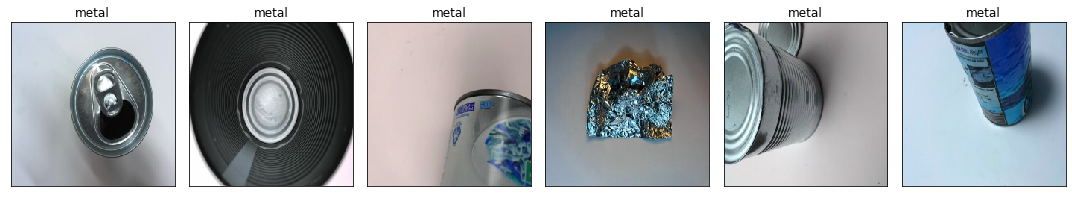

In [36]:
# show image in visualization form

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(cardboard_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("cardboard")
    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(glass_train_images[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.set_title("glass")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(metal_train_images[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.set_title("metal")
fig.tight_layout()    
plt.show()

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
# for i, ax in enumerate(axes.flat):
#     img = cv2.imread(paper_train_images[i])
#     img = cv2.resize(img, (220,220))
#     ax.imshow(img)
#     ax.set_title("paper")
# fig.tight_layout()    
# plt.show()

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
# for i, ax in enumerate(axes.flat):
#     img = cv2.imread(plastic_train_images[i])
#     img = cv2.resize(img, (220,220))
#     ax.imshow(img)
#     ax.set_title("plastic")
# fig.tight_layout()    
# plt.show()

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
# for i, ax in enumerate(axes.flat):
#     img = cv2.imread(trash_train_images[i])
#     img = cv2.resize(img, (220,220))
#     ax.imshow(img)
#     ax.set_title("trash")
# fig.tight_layout()    
# plt.show()

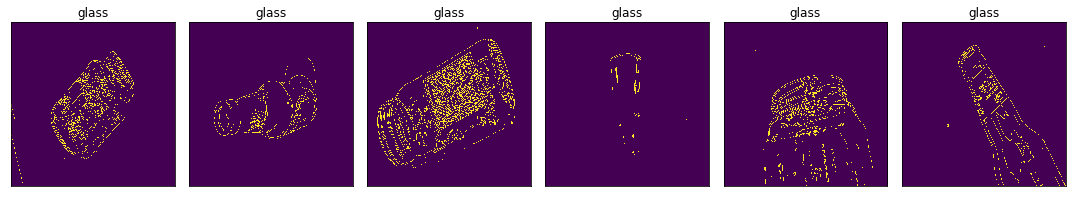

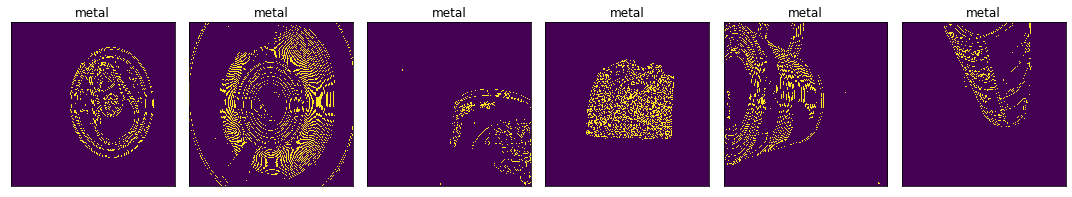

In [37]:
# show image in another format 
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(glass_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("glass")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(metal_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("metal")
fig.tight_layout()    
plt.show()

In [44]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)


train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='categorical', target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory(test_dir, batch_size=20, class_mode = 'categorical', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(val_dir,shuffle=False, batch_size=20, class_mode = 'categorical', target_size=(220, 220))

Found 1768 images belonging to 6 classes.
Found 431 images belonging to 6 classes.
Found 328 images belonging to 6 classes.


In [45]:

train_generator.image_shape, train_generator.n, train_generator.batch_size

((220, 220, 3), 1768, 20)

In [48]:
# Define hyper perameters
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(220,220,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [49]:
# model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
# now finally train the simpole CNN model 
history = model.fit(train_generator,
                    steps_per_epoch=50,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 99s 2s/step - loss: 1.4854 - accuracy: 0.3725 - val_loss: 1.3551 - val_accuracy: 0.4408
Epoch 2/20
50/50 [==============================] - 100s 2s/step - loss: 1.4096 - accuracy: 0.4170 - val_loss: 1.4156 - val_accuracy: 0.4084
Epoch 3/20
50/50 [==============================] - 99s 2s/step - loss: 1.3561 - accuracy: 0.4565 - val_loss: 1.2436 - val_accuracy: 0.4988
Epoch 4/20
50/50 [==============================] - 100s 2s/step - loss: 1.2970 - accuracy: 0.4770 - val_loss: 1.3295 - val_accuracy: 0.4988
Epoch 5/20
50/50 [==============================] - 99s 2s/step - loss: 1.2766 - accuracy: 0.5162 - val_loss: 1.3598 - val_accuracy: 0.4362
Epoch 6/20
50/50 [==============================] - 99s 2s/step - loss: 1.2301 - accuracy: 0.4910 - val_loss: 1.3778 - val_accuracy: 0.5012
Epoch 7/20
50/50 [==============================] - 99s 2s/step - loss: 1.2664 - accuracy: 0.5090 - val_loss: 1.2158 - val_accuracy: 0.5267
Epoch 8/20
50/50 [

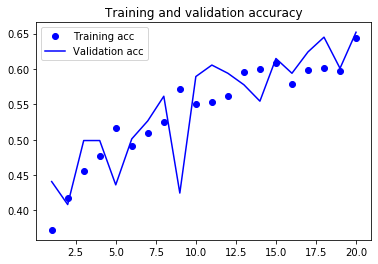

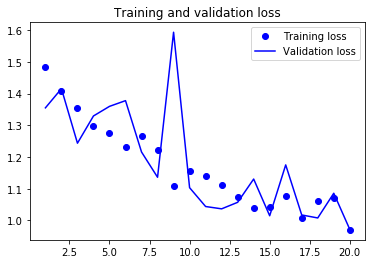

In [53]:
# Graphical representation of model Accuracy and loss.
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
model.save('Garbage classification simple CNN.h5')